## NFL Data Manip and Visuals

In [2]:
import pandas as pd
import numpy as np
import nfl_data_py as nfl
import matplotlib.pyplot as plt
import os

os.chdir("/Users/jakeblumengarten/git_repository/nfl_analysis")

In [15]:
season24 = pd.read_csv('2024.csv', low_memory = False)

ypg = season24.groupby("posteam").agg(
    totalyards = ("yards_gained", "sum")
)

ypg["yards_per_game"] = ypg["totalyards"] /17

winpct = [.471, .471, .706, .765, .294, .294, .529, .176, .412, .588, .882, .647, .588, .471, .235, .882, .235, .647, .588, .471, .824, .235, .294, .176, .294, .824, .588, .353, .588, .588, .176, .706]
ypg["winpct"] = winpct
ypg = ypg.sort_values("yards_per_game", ascending= True)

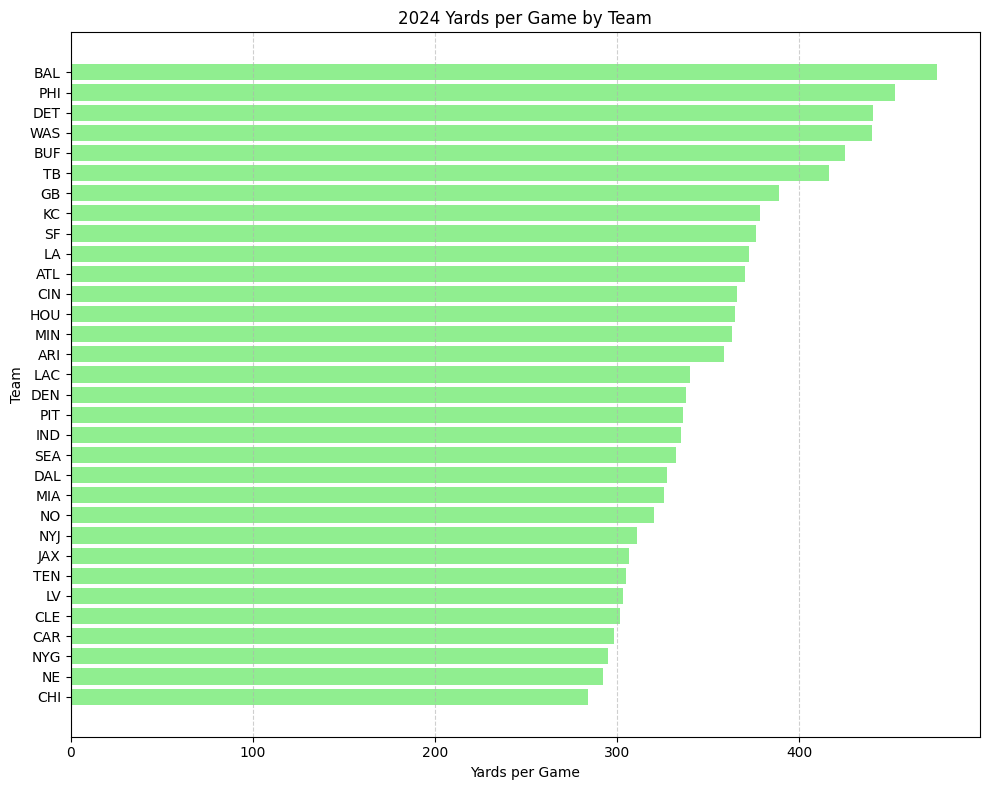

In [18]:
plt.figure(figsize=(10, 8))

# Plot using barh (horizontal bar)
plt.barh(ypg.index, ypg["yards_per_game"], color='lightgreen')

plt.ylabel("Team")
plt.xlabel("Yards per Game")
plt.title("2024 Yards per Game by Team")
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

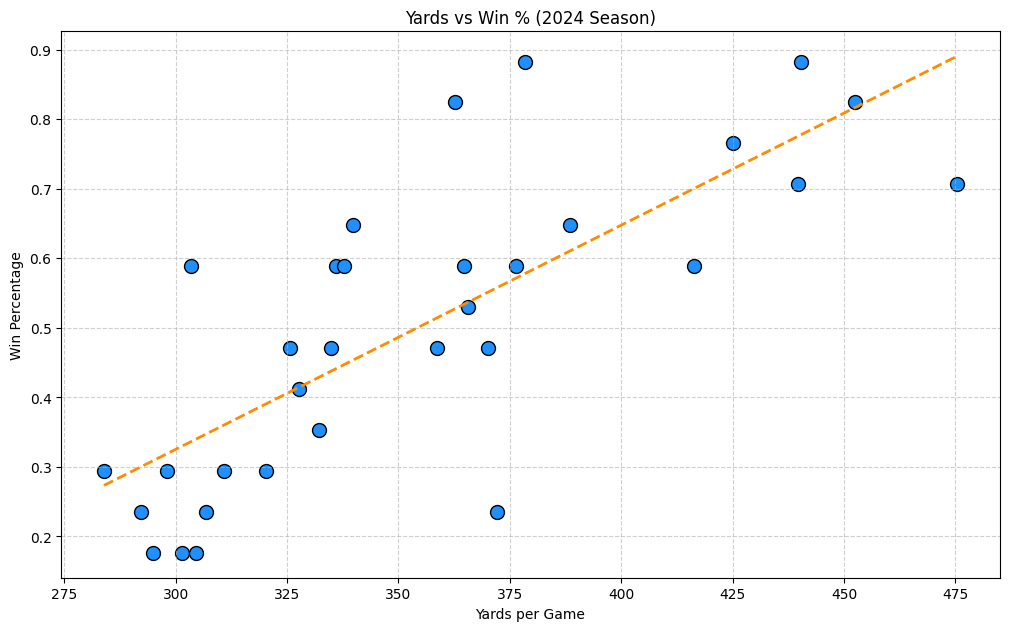

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(ypg["yards_per_game"], ypg["winpct"], color='dodgerblue', edgecolors= 'black', s = 100)
plt.grid(True, linestyle = '--', alpha = 0.6)
m, b = np.polyfit(ypg["yards_per_game"], ypg["winpct"], 1)# Fit a line (degree=1 for linear)
x_vals = np.linspace(ypg["yards_per_game"].min(), ypg["yards_per_game"].max(), 100) # Add regression line
plt.plot(x_vals, m * x_vals + b, color='darkorange', linestyle='--', linewidth=2)
plt.tight_layout()
plt.xlabel("Yards per Game")
plt.ylabel("Win Percentage")
plt.title("Yards vs Win % (2024 Season)")
plt.show()